In [1]:
import pandas as pd

In [4]:
s = pd.read_csv('./occupancy_6005.csv', index_col="timestamp", parse_dates=True, squeeze=True)
# s = pd.read_csv('./periodic_wave.csv', index_col="timestamp", parse_dates=True, squeeze=True)

In [5]:
s

timestamp
2015-09-01 13:45:00    3.06
2015-09-01 13:50:00    6.44
2015-09-01 13:55:00    5.17
2015-09-01 14:00:00    3.83
2015-09-01 14:05:00    4.50
                       ... 
2015-09-17 16:04:00    9.28
2015-09-17 16:09:00    5.06
2015-09-17 16:14:00    3.44
2015-09-17 16:19:00    8.50
2015-09-17 16:24:00    5.56
Name: value, Length: 2380, dtype: float64

In [6]:
from adtk.data import validate_series

In [7]:
s = validate_series(s)

In [8]:
s

timestamp
2015-09-01 13:45:00    3.06
2015-09-01 13:50:00    6.44
2015-09-01 13:55:00    5.17
2015-09-01 14:00:00    3.83
2015-09-01 14:05:00    4.50
                       ... 
2015-09-17 16:04:00    9.28
2015-09-17 16:09:00    5.06
2015-09-17 16:14:00    3.44
2015-09-17 16:19:00    8.50
2015-09-17 16:24:00    5.56
Name: value, Length: 2380, dtype: float64

In [9]:
from adtk.visualization import plot

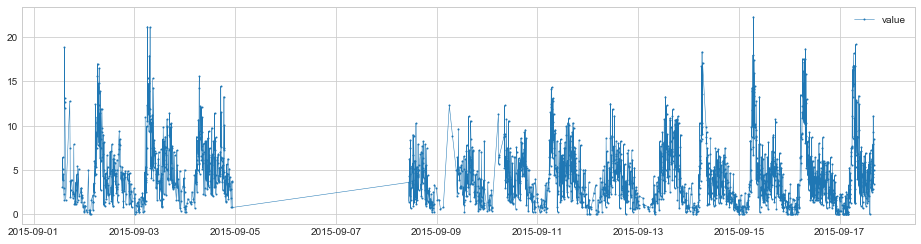

In [14]:
plot(s)

In [10]:
from adtk.detector import ThresholdAD

In [27]:
threshold_ad = ThresholdAD(high=15, low=2)
anomalies = threshold_ad.detect(s)

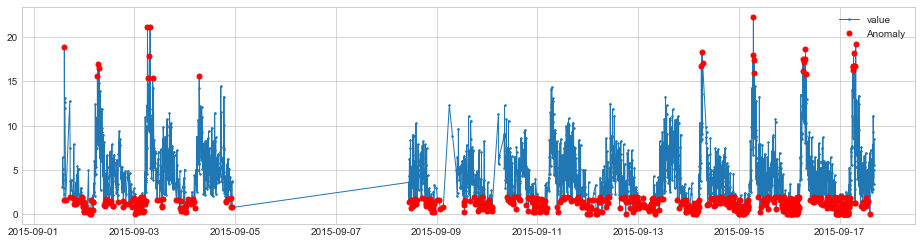

In [28]:
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker")

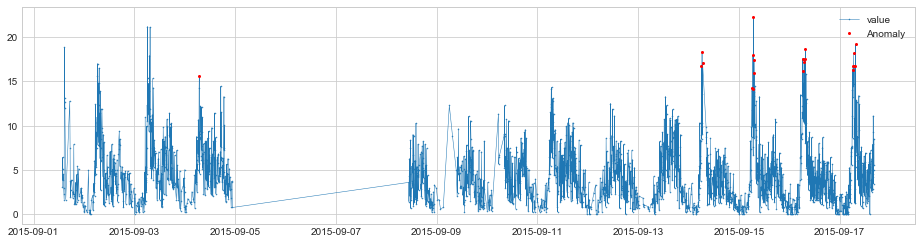

In [29]:
from adtk.detector import AutoregressionAD
autoregression_ad = AutoregressionAD(n_steps=7*2, step_size=24, c=3.0)
anomalies = autoregression_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_markersize=1, anomaly_color='red', anomaly_tag="marker", anomaly_markersize=2);